<a href="https://colab.research.google.com/github/sugiyama404/ReinfoceLearningForTrading/blob/main/make_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import copy

import seaborn as sns

drive.mount('/content/drive/')
exp_dir = 'Colab Notebooks/workspace/export/csv_data/'

random_path = '/content/drive/My Drive/' + exp_dir + 'random_test.csv'
qlearning_path = '/content/drive/My Drive/' + exp_dir + 'qlearning_test.csv'
sarsa_path = '/content/drive/My Drive/' + exp_dir + 'sarsa_test.csv'
a2c_path = '/content/drive/My Drive/' + exp_dir + 'a2c_test.csv'
a3c_path = '/content/drive/My Drive/' + exp_dir + 'a3c_test.csv'
w_qlearning_path = '/content/drive/My Drive/' + exp_dir + 'w_qlearning_test.csv'
gorila_path = '/content/drive/My Drive/' + exp_dir + 'gorila_test.csv'
ppo_path = '/content/drive/My Drive/' + exp_dir + 'ppo_test.csv'

Mounted at /content/drive/


In [2]:
df_r = pd.read_csv(random_path)
df_q = pd.read_csv(qlearning_path)
df_s = pd.read_csv(sarsa_path)
df_a2c = pd.read_csv(a2c_path)
df_a3c = pd.read_csv(a3c_path)
df_wq = pd.read_csv(w_qlearning_path)
df_gorila = pd.read_csv(gorila_path)
df_ppo = pd.read_csv(ppo_path)
df_r_1 = df_r.drop("Unnamed: 0", axis=1)
df_q_1 = df_q.drop("Unnamed: 0", axis=1)
df_s_1 = df_s.drop("Unnamed: 0", axis=1)
df_a2c_1 = df_a2c.drop("Unnamed: 0", axis=1)
df_a3c_1 = df_a3c
df_wq_1 = df_wq.drop("Unnamed: 0", axis=1)
df_gorila_1 = df_gorila
df_ppo_1 = df_ppo
df_r_1['WinRate'] = df_r_1['TradeWin'] / df_r_1['TradeTimes'] * 100
df_q_1['WinRate'] = df_q_1['TradeWin'] / df_q_1['TradeTimes'] * 100
df_s_1['WinRate'] = df_s_1['TradeWin'] / df_s_1['TradeTimes'] * 100
df_a2c_1['WinRate'] = df_a2c_1['TradeWin'] / df_a2c_1['TradeTimes'] * 100
df_a3c_1['WinRate'] = df_a3c_1['TradeWin'] / df_a3c_1['TradeTimes'] * 100
df_wq_1['WinRate'] = df_wq_1['TradeWin'] / df_wq_1['TradeTimes'] * 100
df_gorila_1['WinRate'] = df_gorila_1['TradeWin'] / df_gorila_1['TradeTimes'] * 100
df_ppo_1['WinRate'] = df_ppo_1['TradeWin'] / df_ppo_1['TradeTimes'] * 100

df_r_1['WinRate'] = df_r_1['WinRate'].fillna(0)
df_q_1['WinRate'] = df_q_1['WinRate'].fillna(0)
df_s_1['WinRate'] = df_s_1['WinRate'].fillna(0)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].fillna(0)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].fillna(0)
df_wq_1['WinRate'] = df_wq_1['WinRate'].fillna(0)
df_gorila_1['WinRate'] = df_gorila_1['WinRate'].fillna(0)
df_ppo_1['WinRate'] = df_ppo_1['WinRate'].fillna(0)

df_r_1['WinRate'] = df_r_1['WinRate'].round(2)
df_q_1['WinRate'] = df_q_1['WinRate'].round(2)
df_s_1['WinRate'] = df_s_1['WinRate'].round(2)
df_a2c_1['WinRate'] = df_a2c_1['WinRate'].round(2)
df_a3c_1['WinRate'] = df_a3c_1['WinRate'].round(2)
df_wq_1['WinRate'] = df_wq_1['WinRate'].round(2)
df_gorila_1['WinRate'] = df_gorila_1['WinRate'].round(2)
df_ppo_1['WinRate'] = df_ppo_1['WinRate'].round(2)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfit'] /1000000 * 100
df_q_1['FixedProfitRate'] = df_q_1['FixedProfit'] /1000000 * 100
df_s_1['FixedProfitRate'] = df_s_1['FixedProfit'] /1000000 * 100
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfit'] /1000000 * 100
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfit'] /1000000 * 100
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfit'] /1000000 * 100
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfit'] /1000000 * 100
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfit'] /1000000 * 100

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].fillna(0)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].fillna(0)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].fillna(0)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].fillna(0)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].fillna(0)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].fillna(0)
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfitRate'].fillna(0)
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfitRate'].fillna(0)

df_r_1['FixedProfitRate'] = df_r_1['FixedProfitRate'].round(2)
df_q_1['FixedProfitRate'] = df_q_1['FixedProfitRate'].round(2)
df_s_1['FixedProfitRate'] = df_s_1['FixedProfitRate'].round(2)
df_a2c_1['FixedProfitRate'] = df_a2c_1['FixedProfitRate'].round(2)
df_a3c_1['FixedProfitRate'] = df_a3c_1['FixedProfitRate'].round(2)
df_wq_1['FixedProfitRate'] = df_wq_1['FixedProfitRate'].round(2)
df_gorila_1['FixedProfitRate'] = df_gorila_1['FixedProfitRate'].round(2)
df_ppo_1['FixedProfitRate'] = df_ppo_1['FixedProfitRate'].round(2)

del df_r_1['FixedProfit']
del df_r_1['TradeTimes']
del df_r_1['TradeWin']
del df_q_1['FixedProfit']
del df_q_1['TradeTimes']
del df_q_1['TradeWin']
del df_s_1['FixedProfit']
del df_s_1['TradeTimes']
del df_s_1['TradeWin']
del df_a2c_1['FixedProfit']
del df_a2c_1['TradeTimes']
del df_a2c_1['TradeWin']
del df_a3c_1['FixedProfit']
del df_a3c_1['TradeTimes']
del df_a3c_1['TradeWin']
del df_wq_1['FixedProfit']
del df_wq_1['TradeTimes']
del df_wq_1['TradeWin']
del df_gorila_1['FixedProfit']
del df_gorila_1['TradeTimes']
del df_gorila_1['TradeWin']
del df_ppo_1['FixedProfit']
del df_ppo_1['TradeTimes']
del df_ppo_1['TradeWin']
df_ppo_1

,WinRate,FixedProfitRate
0,33.33,93.12
1,100.00,104.51
2,66.67,95.77
3,100.00,135.22
4,0.00,97.94
...,...,...
95,50.00,102.73
96,50.00,115.15
97,75.00,109.82
98,66.67,122.61


In [3]:
df_a = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning','gorila','ppo'])
df_a['random'] = df_r_1['FixedProfitRate']
df_a['qlearning'] = df_q_1['FixedProfitRate']
df_a['sarsa'] = df_s_1['FixedProfitRate']
df_a['a2c'] = df_a2c_1['FixedProfitRate']
df_a['a3c'] = df_a3c_1['FixedProfitRate']
df_a['w_qlearning'] = df_wq_1['FixedProfitRate']
df_a['gorila'] = df_gorila_1['FixedProfitRate']
df_a['ppo'] = df_ppo_1['FixedProfitRate']

df_b = pd.DataFrame(columns=['random', 'qlearning', 'sarsa', 'a2c', 'a3c','w_qlearning','gorila','ppo'])
df_b['random'] = df_r_1['WinRate']
df_b['qlearning'] = df_q_1['WinRate']
df_b['sarsa'] = df_s_1['WinRate']
df_b['a2c'] = df_a2c_1['WinRate']
df_b['a3c'] = df_a3c_1['WinRate']
df_b['w_qlearning'] = df_wq_1['WinRate']
df_b['gorila'] = df_gorila_1['WinRate']
df_b['ppo'] = df_ppo_1['WinRate']

dfTa_melt = pd.melt(df_a)
dfTa_melt['species'] = 'FixedProfitRate'

dfAt_melt = pd.melt(df_b)
dfAt_melt['species'] = 'WinRate'

df = pd.concat([dfAt_melt, dfTa_melt], axis=0)
df

,variable,value,species
0,random,63.01,WinRate
1,random,60.90,WinRate
2,random,57.33,WinRate
3,random,65.28,WinRate
4,random,55.13,WinRate
...,...,...,...
795,ppo,102.73,FixedProfitRate
796,ppo,115.15,FixedProfitRate
797,ppo,109.82,FixedProfitRate
798,ppo,122.61,FixedProfitRate


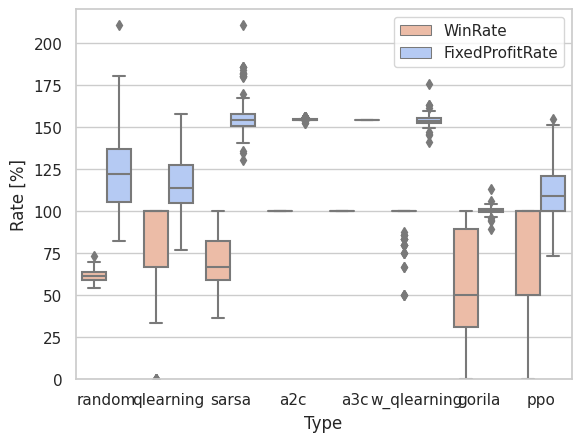

In [4]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set3')


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='variable', y='value', data=df, hue='species', palette='coolwarm_r', ax=ax)


ax.set_xlabel('Type')
ax.set_ylabel('Rate [%]')
ax.set_ylim(0, 220)
ax.legend()

plt.show()